In [1]:
#coding:utf-8
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
import os

/Users/keita_kuki/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# ファイルパス（要変更）
csv_path = "assets/irasutoya_check_kuki.csv"
image_directory_path = "assets/irasutoya_image_kuki"

# 定数
true_char = "d" # あっているときに入力する文字
false_char = "f" # あっていないときに入力する文字
result_path = "result.csv"
df = pd.read_csv(csv_path, skiprows=1, names=("id", "file_name", "title", "caption", "translation", "word", "check"))

In [5]:
def get_starting_index():
    try:
        tmp = pd.read_csv(result_path, names=("id", "file_name", "title", "caption", "translation", "word", "check"))
        return get_index_from_id(tmp.iloc[-1]["id"] + 1)
    except:
        f = open(result_path, "a")
        f.close()
        return 0
    
def get_index_from_id(id):
    return df[df["id"] == id].head(1).index[0]

def show_image(ix):
    row = df.iloc[ix]
    print(f"{row['word']}")
    print(f"{row['translation']}")
    im = Image.open(f"{image_directory_path}/{row['word']}/{row['file_name']}")
    plt.imshow(np.asarray(im))
    plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    plt.show()
    plt.close()
    print(f"{row['title']}")
    print(f"{row['caption']}")
    
def read_input():
    while True:
        c = input()
        if c == true_char:
            return 1
        elif c == false_char:
            return 0
        
def save(ix, check):
    row = df.iloc[ix]
    data = [row["id"], row["file_name"], row["title"], row["caption"], row["translation"], row["word"], check]
    data = map(lambda x: str(x), data)
    data = ",".join(data) + "\n"
    f = open(result_path, "a")
    f.write(data)
    f.close()

def main():
    starting_index = get_starting_index()
    for ix in range(starting_index, len(df)-1):
        show_image(ix)
        check = read_input()
        save(ix, check)
        clear_output()

halve
割る


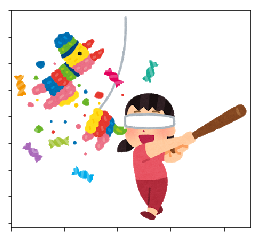

ピニャータを叩き割る女の子のイラスト
誕生日の女の子がピニャータ（くす玉人形）をバットで叩き割って中のお菓子をばらまいているイラストです。


KeyboardInterrupt: 

In [6]:
main()